<a href="https://colab.research.google.com/github/IsaganiJulian/Marketing_Campaign_DTSC/blob/main/Isagani_Copy_of_MarketingCampaignAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### marketing_campaign data set

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

marketing_data = pd.read_csv('/content/marketing_campaign_dataset.csv')
marketing_data

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [ ]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

### Data Types:

**Numerical**:
Campaign_ID: Unique identifier for each campaign.
Clicks, Impressions, Engagement_Score: Numerical counts.
Conversion_Rate, ROI: Numerical ratios or percentages.

**Categorical**:
Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Acquisition_Cost, Location, Language, Customer_Segment, Date: Textual data.

In [ ]:
marketing_data.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


### Data Cleaning

In [ ]:
marketing_data.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
rows_with_nulls = marketing_data[marketing_data.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Language, Clicks, Impressions, Engagement_Score, Customer_Segment, Date]
Index: []


In [ ]:
marketing_data = marketing_data.drop(23279) # Drops row with index 23279
marketing_data = marketing_data.reset_index(drop=True) # Resets the index

In [ ]:
# Convert Date to date time
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'], errors='coerce')

# Convert Acquisition_Cost to numerical
marketing_data['Acquisition_Cost'] = marketing_data['Acquisition_Cost'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

# Convert Duration to numerical and rename it Duration_Days
marketing_data['Duration_Days'] = marketing_data['Duration'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
marketing_data = marketing_data.drop('Duration', axis=1, errors='ignore')

# Print data types
print(marketing_data.dtypes)

Campaign_ID                  int64
Company                     object
Campaign_Type               object
Target_Audience             object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                    object
Language                    object
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment            object
Date                datetime64[ns]
Duration_Days                int64
dtype: object


#### Identify Outliers

In [ ]:
numeric_columns = ['Clicks', 'Impressions', 'Engagement_Score', 'Conversion_Rate', 'ROI', 'Acquisition_Cost', 'Duration_Days']

In [ ]:
# Before handling outliers
print("Descriptive Statistics Before:")
print(marketing_data[numeric_columns].describe())

Descriptive Statistics Before:
              Clicks    Impressions  Engagement_Score  Conversion_Rate  \
count  199999.000000  199999.000000     199999.000000    199999.000000   
mean      549.774279    5507.322397          5.494727         0.080069   
std       260.017761    2596.853995          2.872578         0.040602   
min       100.000000    1000.000000          1.000000         0.010000   
25%       325.000000    3266.000000          3.000000         0.050000   
50%       550.000000    5518.000000          5.000000         0.080000   
75%       775.000000    7753.000000          8.000000         0.120000   
max      1000.000000   10000.000000         10.000000         0.150000   

                 ROI  Acquisition_Cost  Duration_Days  
count  199999.000000     199999.000000  199999.000000  
mean        5.002443      12504.427662      37.504088  
std         1.734491       4337.647755      16.746686  
min         2.000000       5000.000000      15.000000  
25%         3.500000  

In [ ]:
# Function to handle the outliers in my marketing_data
def handle_outliers(marketing_data, column):
  """
  Detect and handle the outliers in the numeric columns using the IQR method.
  """

  Q1 = marketing_data[column].quantile(0.25)
  Q3 = marketing_data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Replace outliers with winsorization
  marketing_data[column] = np.where(marketing_data[column] < lower_bound, lower_bound, marketing_data[column])
  marketing_data[column] = np.where(marketing_data[column] > upper_bound, upper_bound, marketing_data[column])

  return marketing_data

# Loop through numeric columns and handle outliers
for col in numeric_columns:
    marketing_data = handle_outliers(marketing_data, col)


In [ ]:
# After handling outliers
print("\nDescriptive Statistics After:")
print(marketing_data[numeric_columns].describe())


Descriptive Statistics After:
              Clicks    Impressions  Engagement_Score  Conversion_Rate  \
count  199999.000000  199999.000000     199999.000000    199999.000000   
mean      549.774279    5507.322397          5.494727         0.080069   
std       260.017761    2596.853995          2.872578         0.040602   
min       100.000000    1000.000000          1.000000         0.010000   
25%       325.000000    3266.000000          3.000000         0.050000   
50%       550.000000    5518.000000          5.000000         0.080000   
75%       775.000000    7753.000000          8.000000         0.120000   
max      1000.000000   10000.000000         10.000000         0.150000   

                 ROI  Acquisition_Cost  Duration_Days  
count  199999.000000     199999.000000  199999.000000  
mean        5.002443      12504.427662      37.504088  
std         1.734491       4337.647755      16.746686  
min         2.000000       5000.000000      15.000000  
25%         3.500000  

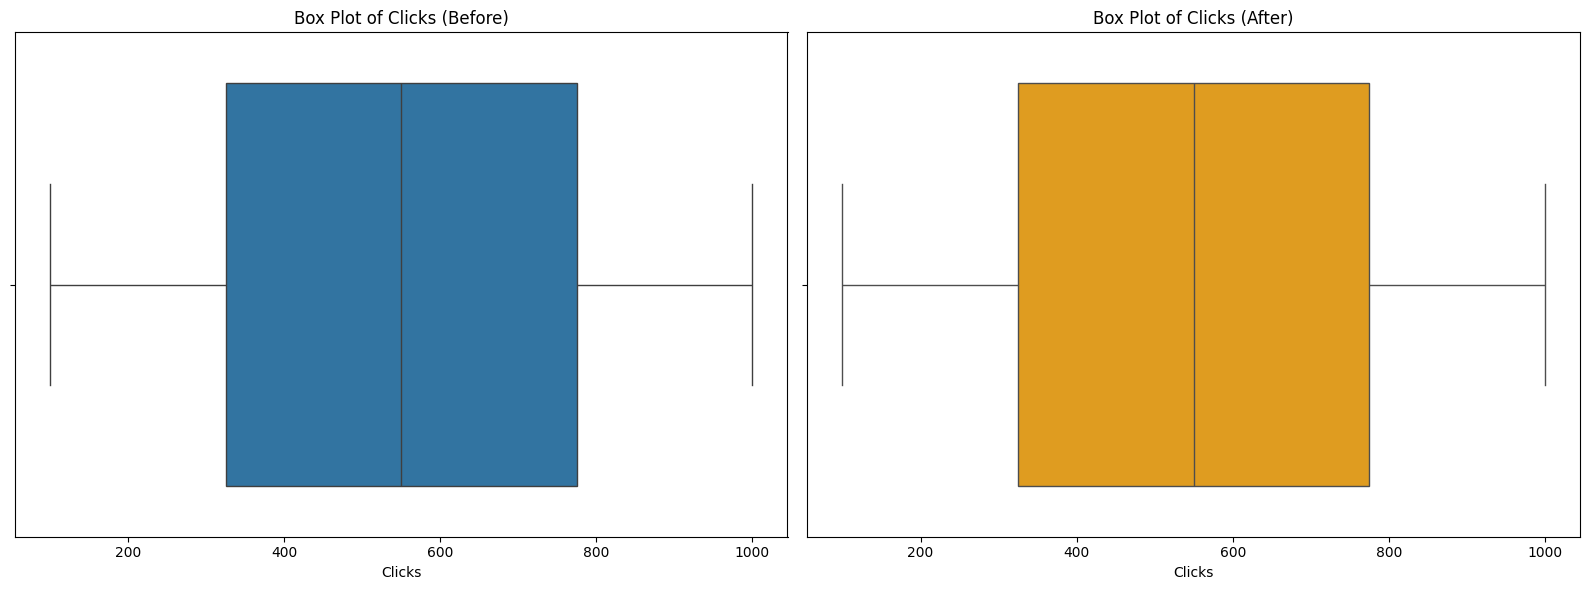

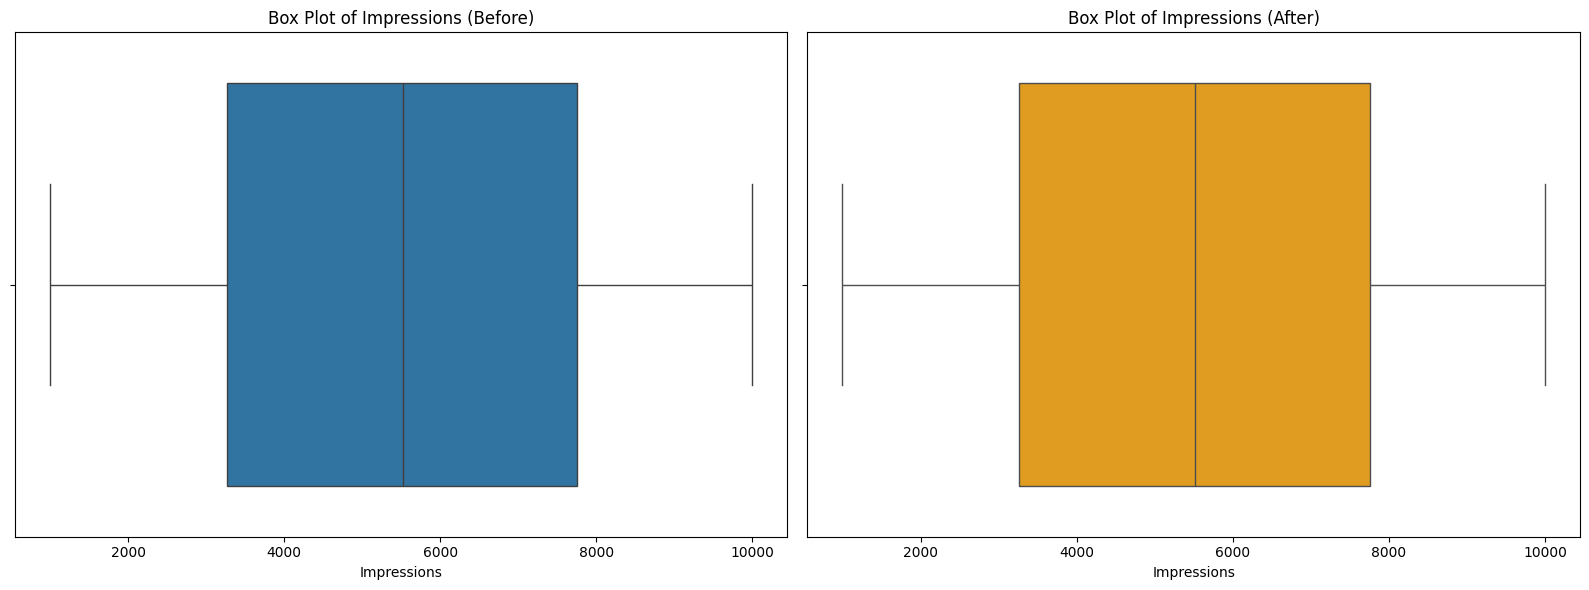

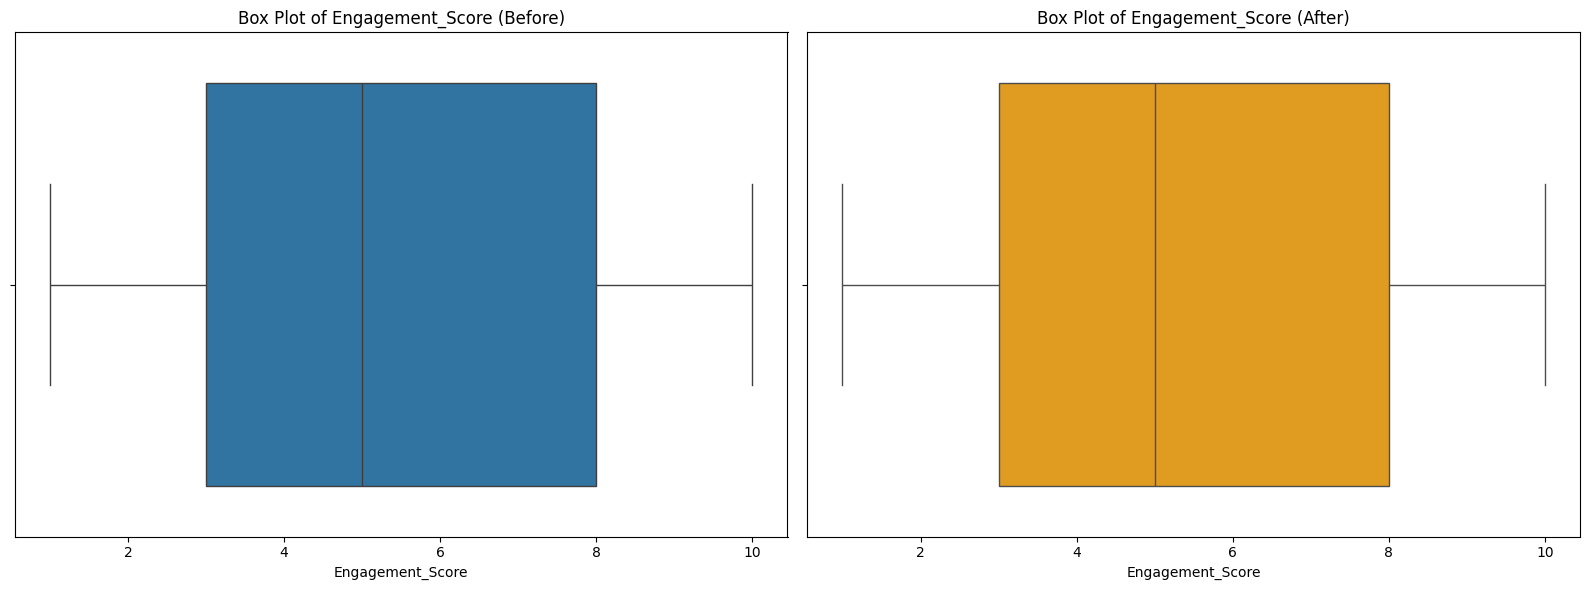

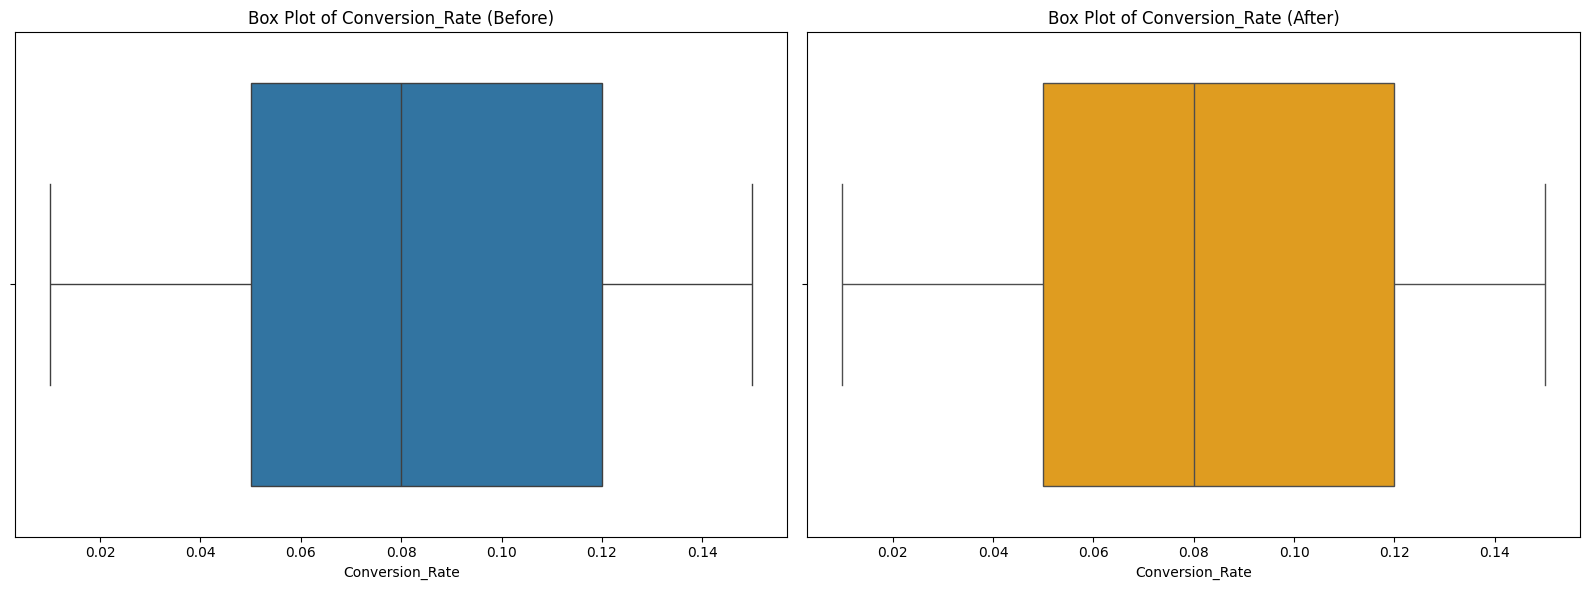

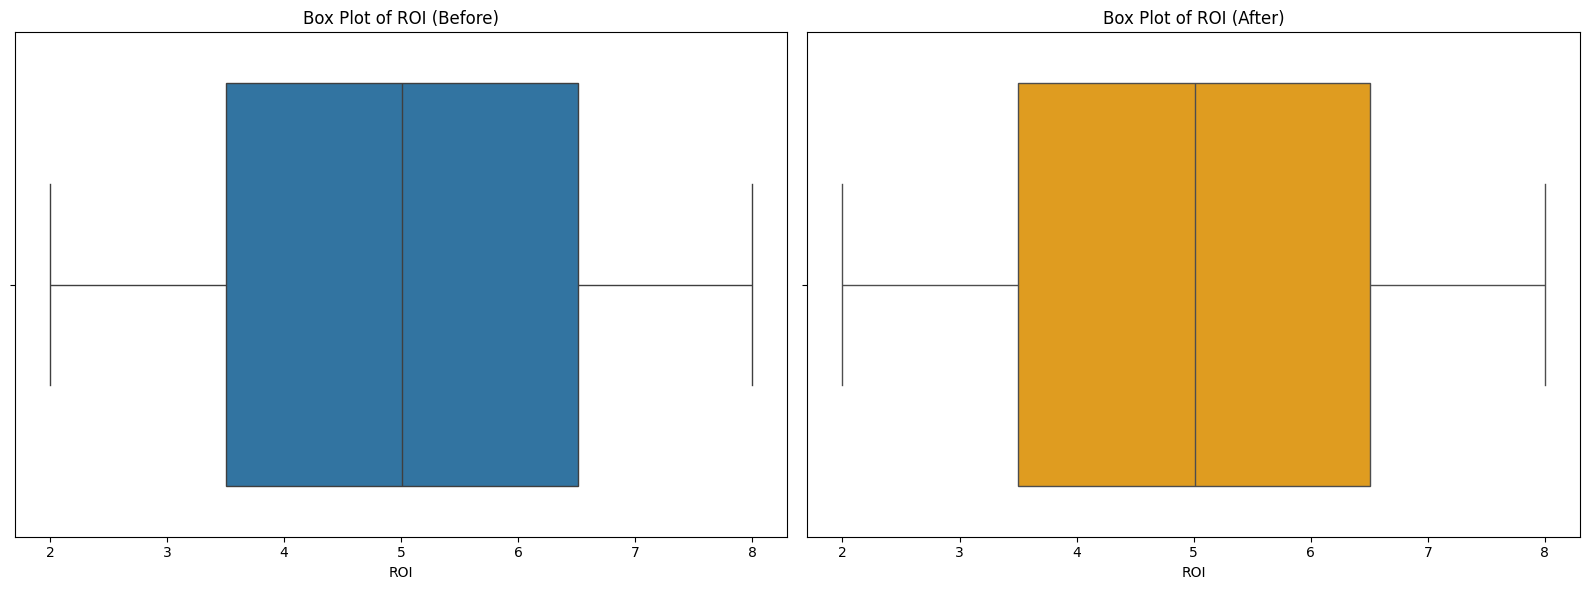

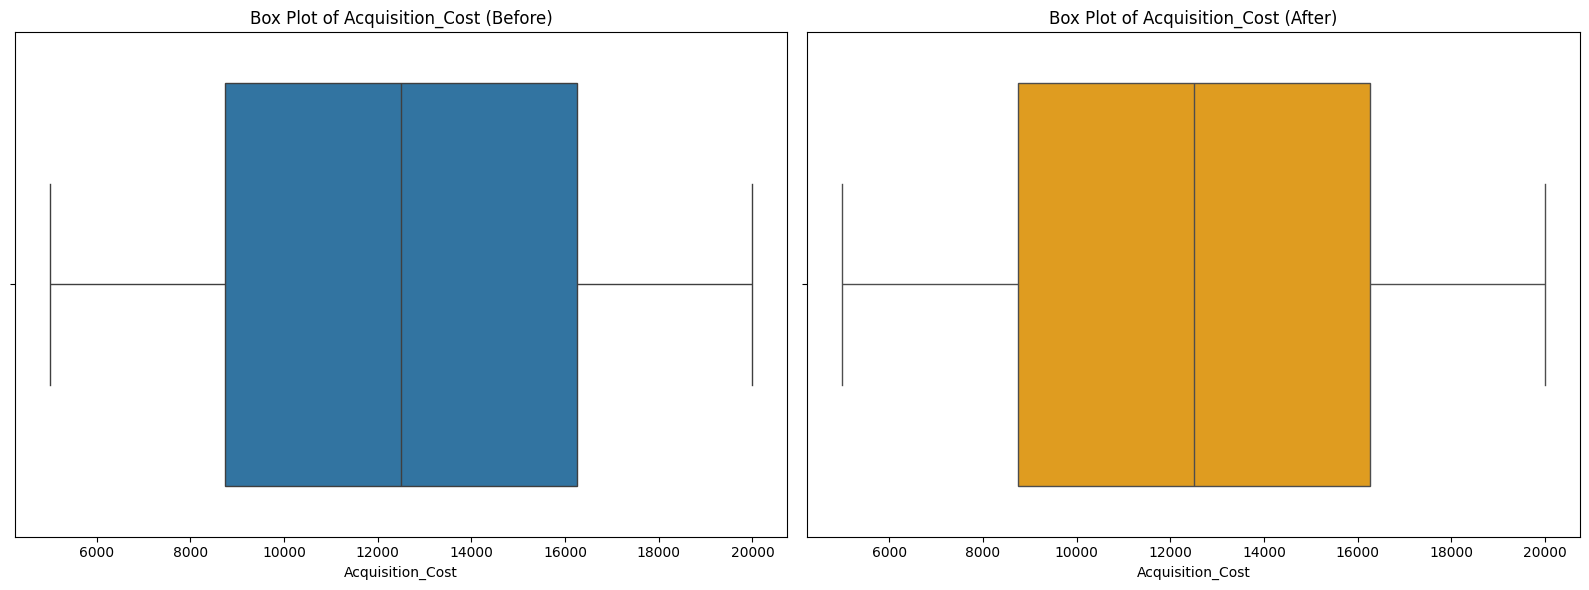

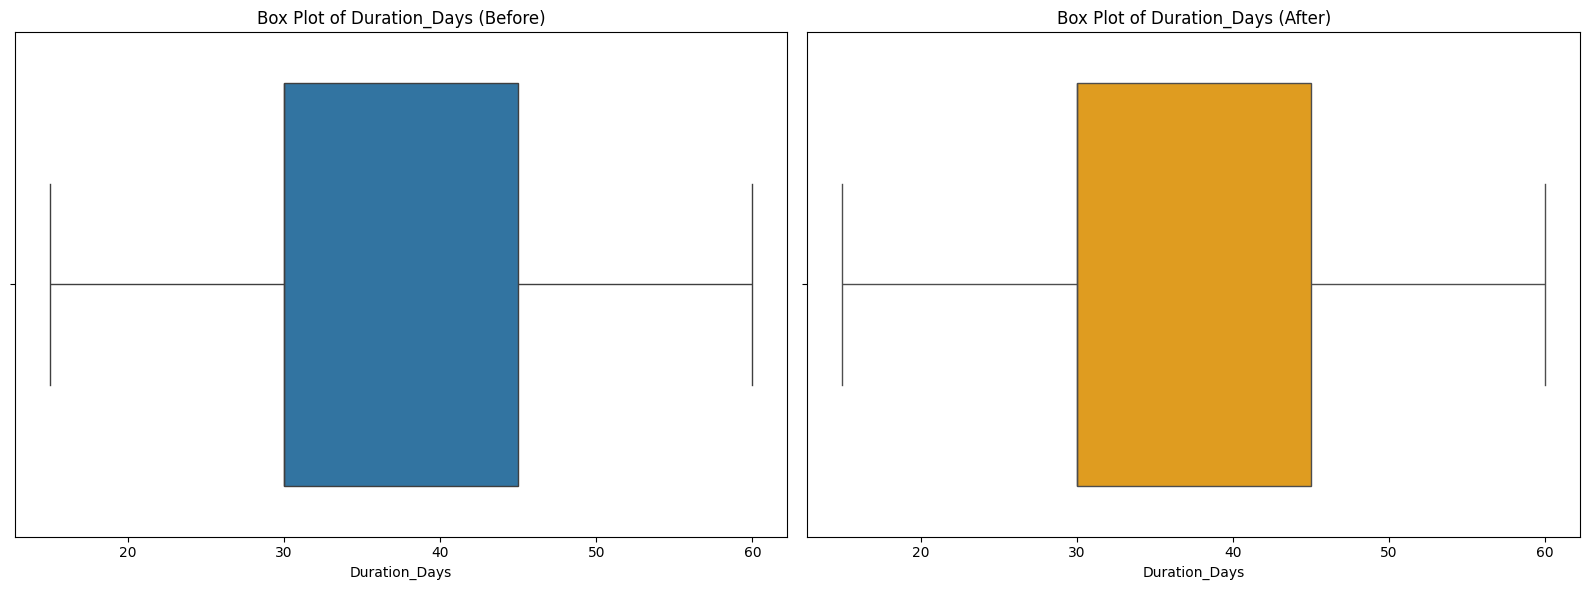

In [ ]:
# Create a figure with two subplots (side-by-side)
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # Box plot before outlier handling
    sns.boxplot(x=marketing_data[col], ax=axes[0])  # Plot on the first subplot
    axes[0].set_title(f'Box Plot of {col} (Before)')

    # Assuming you have a 'marketing_data_cleaned' DataFrame after outlier handling
    sns.boxplot(x=marketing_data[col], ax=axes[1], color='orange')  # Plot on the second subplot
    axes[1].set_title(f'Box Plot of {col} (After)')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

- Outlier Analysis: We examined the distribution of numeric variables using box plots and descriptive statistics. No significant outliers were detected, suggesting that the data points are within an expected range. Therefore, we proceeded with further analysis without applying outlier handling techniques.

In [ ]:
# Target_Audience data clean and feature engineering

# Create new columns for Men and Women
marketing_data['Men'] = marketing_data['Target_Audience'].apply(lambda x: True if 'men' in x.lower() or x.lower() == 'all ages' else False)
marketing_data['Women'] = marketing_data['Target_Audience'].apply(lambda x: True if 'women' in x.lower() or x.lower() == 'all ages' else False)

# Extract age range using regex
marketing_data['Age_Range'] = marketing_data['Target_Audience'].str.extract(r'(\d+-\d+)')

# Fill NaN with "All Ages"
marketing_data['Age_Range'] = marketing_data['Age_Range'].fillna('All Ages')

# Display the updated DataFrame
marketing_data[['Target_Audience', 'Men', 'Women', 'Age_Range']].head()

,Target_Audience,Men,Women,Age_Range
0,Men 18-24,True,False,18-24
1,Women 35-44,True,True,35-44
2,Men 25-34,True,False,25-34
3,All Ages,True,True,All Ages
4,Men 25-34,True,False,25-34


In [ ]:
# Drop Target_Audience
marketing_data = marketing_data.drop('Target_Audience', axis=1)
# Drop Campaign_ID
marketing_data = marketing_data.drop('Campaign_ID', axis=1)
marketing_data.head()

,Company,Campaign_Type,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Duration_Days,Men,Women,Age_Range
0,Innovate Industries,Email,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506.0,1922.0,6.0,Health & Wellness,2021-01-01,30.0,True,False,18-24
1,NexGen Systems,Email,Google Ads,0.12,11566.0,5.61,New York,German,116.0,7523.0,7.0,Fashionistas,2021-01-02,60.0,True,True,35-44
2,Alpha Innovations,Influencer,YouTube,0.07,10200.0,7.18,Los Angeles,French,584.0,7698.0,1.0,Outdoor Adventurers,2021-01-03,30.0,True,False,25-34
3,DataTech Solutions,Display,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217.0,1820.0,7.0,Health & Wellness,2021-01-04,60.0,True,True,All Ages
4,NexGen Systems,Email,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379.0,4201.0,3.0,Health & Wellness,2021-01-05,15.0,True,False,25-34


## EDA
- How does the campaign affect the performance of key metrics (Clicks, Impressions, engagement_score, conversion rate, and ROI)
- What is the optimal campaign duration, 15, 30, 45, or 60 days?
- Does the campaign duration affect the target audience?

In [ ]:
# Group by duration
duration_groups = marketing_data.groupby('Duration_Days')

# Calculate mean Clicks for each duration group
mean_Clicks_duration = duration_groups['Clicks'].mean()
print("Mean Clicks by Duration:")
print(mean_Clicks_duration)

# Calculate mean Impressions for each duration group
mean_Impressions_duration = duration_groups['Impressions'].mean()
print("\nMean Impressions by Duration:")
print(mean_Impressions_duration)

# Calculate mean engagement score for each duration group
mean_engagement_score_duration = duration_groups['Engagement_Score'].mean()
print("\nMean Engagement Score by Duration:")
print(mean_engagement_score_duration)

Mean Clicks by Duration:
Duration_Days
15.0    550.254369
30.0    550.211183
45.0    549.166806
60.0    549.465046
Name: Clicks, dtype: float64

Mean Impressions by Duration:
Duration_Days
15.0    5539.132830
30.0    5494.852791
45.0    5510.829541
60.0    5484.611378
Name: Impressions, dtype: float64

Mean Engagement Score by Duration:
Duration_Days
15.0    5.502330
30.0    5.505064
45.0    5.489960
60.0    5.481510
Name: Engagement_Score, dtype: float64


Duration does not significantly affect Clicks, Impressions, and engagement scores. We now assess the effect of the campaign type by duration for the Clicks, Impressions, and engagement scores.

In [ ]:
# Create a pivot table for Clicks by campaign type and duration
mean_Clicks_pivot = marketing_data.pivot_table(values='Clicks', index='Campaign_Type', columns='Duration_Days', aggfunc='mean')
print("Mean Clicks by Campaign Type and Duration:")
print(mean_Clicks_pivot)

Mean Clicks by Campaign Type and Duration:
Duration_Days        15.0        30.0        45.0        60.0
Campaign_Type                                                
Display        547.880268  552.777944  554.508826  548.643331
Email          554.781469  547.507065  545.064370  549.547543
Influencer     548.609705  548.227741  546.960423  550.772040
Search         546.776905  551.460614  548.280913  548.010912
Social Media   553.187192  551.092454  551.012631  550.376068


In [ ]:
# Create a pivot table for Impressions by campaign type and duration
mean_Impressions_pivot = marketing_data.pivot_table(values='Impressions', index='Campaign_Type', columns='Duration_Days', aggfunc='mean')
print("\nMean Impressions by Campaign Type and Duration:")
print(mean_Impressions_pivot)


Mean Impressions by Campaign Type and Duration:
Duration_Days         15.0         30.0         45.0         60.0
Campaign_Type                                                    
Display        5519.233873  5462.088982  5544.471414  5489.067899
Email          5560.088653  5509.498848  5527.914173  5488.716951
Influencer     5554.458749  5472.679984  5486.672814  5470.667238
Search         5545.605019  5531.490941  5484.893743  5493.808253
Social Media   5516.232605  5498.575460  5510.799702  5480.612066


In [ ]:
# Create a pivot table for engagement score by campaign type and duration
mean_engagement_score_pivot = marketing_data.pivot_table(values='Engagement_Score', index='Campaign_Type', columns='Duration_Days', aggfunc='mean')
print("\nMean Engagement Score by Campaign Type and Duration:")
print(mean_engagement_score_pivot)


Mean Engagement Score by Campaign Type and Duration:
Duration_Days      15.0      30.0      45.0      60.0
Campaign_Type                                        
Display        5.530757  5.515079  5.504012  5.473483
Email          5.522914  5.514080  5.466203  5.495085
Influencer     5.463332  5.484834  5.497956  5.486786
Search         5.494236  5.491237  5.488188  5.475052
Social Media   5.500352  5.520838  5.493287  5.477225


The mean scores based on campaign type and duration do not show much variance.

In [ ]:
gender_groups = marketing_data.groupby(['Men', 'Women'])[['Clicks', 'Impressions', 'Engagement_Score']]
gender_groups.mean()

Clicks  Impressions  Engagement_Score
Men  Women                                           
True False  549.459274  5500.871850          5.503544
     True   549.985516  5511.648031          5.488815

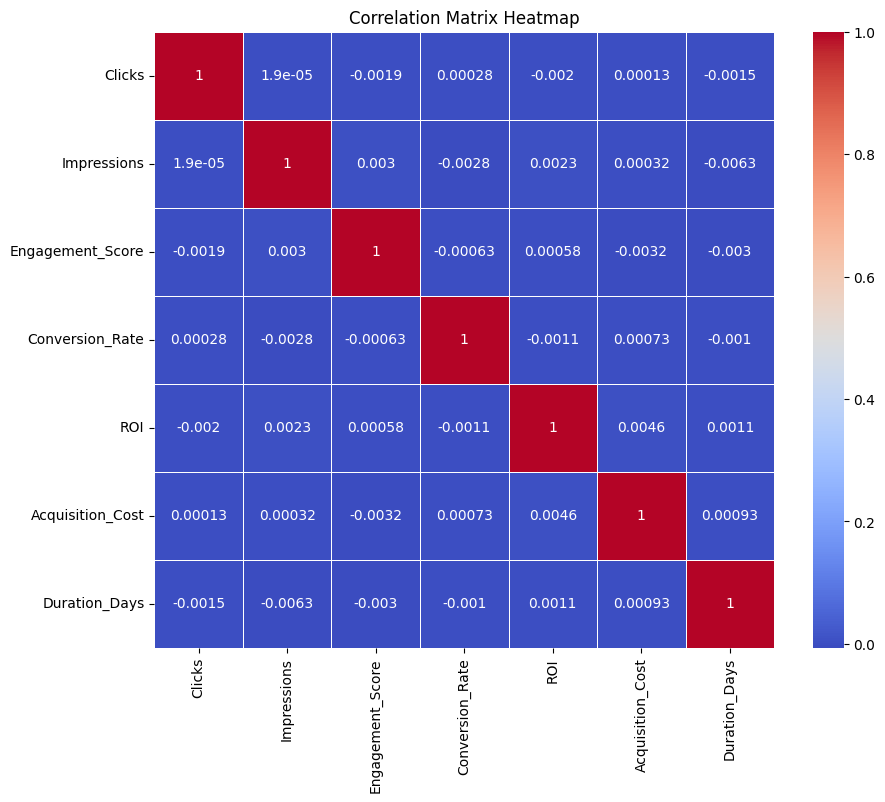

In [ ]:
# Correlation matrix heat map
correlation_matrix = marketing_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap does not depict a strong correlation between our numerical values.

In [ ]:
channel_groups = marketing_data.groupby('Channel_Used')[numeric_columns]
channel_means = channel_groups.mean()

print(channel_means)

                  Clicks  Impressions  Engagement_Score  Conversion_Rate  \
Channel_Used                                                               
Email         550.431947  5500.196643          5.487842         0.080282   
Facebook      549.619032  5504.720680          5.503702         0.079992   
Google Ads    548.501914  5532.833274          5.494049         0.080183   
Instagram     548.534200  5502.469304          5.489039         0.079886   
Website       551.997242  5509.782764          5.508903         0.080183   
YouTube       549.558474  5493.898056          5.485041         0.079888   

                   ROI  Acquisition_Cost  Duration_Days  
Channel_Used                                             
Email         4.996487      12526.387809      37.387273  
Facebook      5.018699      12510.900942      37.601694  
Google Ads    5.003141      12528.031401      37.480711  
Instagram     4.988706      12491.760002      37.382756  
Website       5.014167      12487.814748   

### Sampling on the marketing_data
- Stratified sampling based on 'Channel_Used'

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified based on 'Channel_Used'
X = marketing_data.drop(['Channel_Used', 'Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Acquisition_Cost'], axis=1)
y = marketing_data['Channel_Used']

# Create the stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the split
for train_index, test_index in split.split(X, y):
    strat_train_set = marketing_data.loc[train_index]
    strat_test_set = marketing_data.loc[test_index]

In [ ]:
# Print summary statistics for each set
print("Training set summary:")
print(strat_train_set.describe())
print("\nTest set summary:")
print(strat_test_set.describe())

# Check the distribution of the stratification variable
print("\nTraining set Channel_Used distribution:")
print(strat_train_set['Channel_Used'].value_counts(normalize=True))
print("\nTest set Channel_Used distribution:")
print(strat_test_set['Channel_Used'].value_counts(normalize=True))

Training set summary:
       Conversion_Rate  Acquisition_Cost            ROI         Clicks  \
count    139999.000000     139999.000000  139999.000000  139999.000000   
mean          0.080011      12513.100636       5.005018     549.942435   
min           0.010000       5000.000000       2.000000     100.000000   
25%           0.040000       8739.000000       3.500000     325.000000   
50%           0.080000      12508.000000       5.010000     550.000000   
75%           0.110000      16284.000000       6.510000     775.000000   
max           0.150000      20000.000000       8.000000    1000.000000   
std           0.040628       4341.322710       1.735390     259.775558   

         Impressions  Engagement_Score                           Date  \
count  139999.000000     139999.000000                         139999   
mean     5508.640776          5.485646  2021-07-01 20:00:22.320159232   
min      1000.000000          1.000000            2021-01-01 00:00:00   
25%      3265.00000

Stratification was successful, and the proportions were maintained. The next step is to apply a simulation such as bootstrapping to simulate different scenarios.  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Assuming strat_train_set is your stratified training dataset
# Check if strat_train_set is defined and contains the necessary columns
if 'Conversion_Rate' not in strat_train_set.columns:
    raise ValueError("The 'Conversion_Rate' column is missing from the training set.")

# Separate features and target variable
X = strat_train_set.drop('Conversion_Rate', axis=1)
y = strat_train_set['Conversion_Rate']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train back into a single DataFrame for bootstrapping
train_data = pd.concat([X_train, y_train], axis=1)

# Bootstrapping parameters
n_iterations = 100
n_samples = len(train_data)
bootstrap_results = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Resample with replacement
    bootstrap_sample = resample(train_data, n_samples=n_samples, replace=True)

    # Calculate the mean conversion rate for the bootstrapped sample
    mean_conversion_rate = bootstrap_sample['Conversion_Rate'].mean()
    bootstrap_results.append(mean_conversion_rate)

# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

# Print results
print(f"95% Confidence Interval for Mean Conversion Rate: {confidence_interval}")
print(f"Mean of Bootstrapped Means: {np.mean(bootstrap_results)}")
print(f"Standard Deviation of Bootstrapped Means: {np.std(bootstrap_results)}")

# Now you have:
# X_train, y_train: for model training
# X_val, y_val: for validation
# bootstrap_results: for confidence interval estimation

95% Confidence Interval for Mean Conversion Rate: [0.07974142 0.08025979]
Mean of Bootstrapped Means: 0.07999289368655078
Standard Deviation of Bootstrapped Means: 0.00012031968239379837


- we can be 95% confident that the true population mean conversion rate falls between 7.98% and 8.02%.
- The conversion rate interval is narrow, suggesting high precision in the estimation of the mean conversion rate from the sampled data.
- The bootstrapped mean is 8.00%.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numeric and categorical columns
numeric_features = ['Clicks', 'Impressions', 'Engagement_Score', 'ROI', 'Acquisition_Cost', 'Duration_Days']
categorical_features = ['Channel_Used']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])
# Now you can use the preprocessor
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Parallelize bootstrapping
from joblib import Parallel, delayed
from xgboost import XGBRegressor  # Import XGBRegressor here
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


def train_bootstrap_model(index):
    bootstrap_indices = np.random.choice(len(X_train_transformed), size=n_samples, replace=True)
    bootstrap_X = X_train_transformed[bootstrap_indices]
    bootstrap_y = y_train.iloc[bootstrap_indices]

    # Train model
    xgb_model = XGBRegressor(random_state=42, tree_method="hist")
    xgb_model.fit(bootstrap_X, bootstrap_y)

    # Cross-validation
    scores = cross_val_score(xgb_model, bootstrap_X, bootstrap_y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    # Evaluate on test set
    y_pred = xgb_model.predict(X_test_transformed)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    return test_mse, rmse_scores.mean(), rmse_scores.std(), test_r2

results = Parallel(n_jobs=-1)(delayed(train_bootstrap_model)(i) for i in range(n_iterations))

# Unpack the results
test_mse_results, cv_rmse_means, cv_rmse_stds, test_r2_results = zip(*results)

# Calculate and print metrics
print(f"Mean Test MSE: {np.mean(test_mse_results)}")
print(f"Mean Cross-validated RMSE: {np.mean(cv_rmse_means)} ± {np.mean(cv_rmse_stds)}")
print(f"Mean Test R-squared: {np.mean(test_r2_results)}")

Mean Test MSE: 0.001714932289896022
Mean Cross-validated RMSE: 0.03917939853316297 ± 0.00010854588320460738
Mean Test R-squared: -0.04028595680093518


### Feature Engineering

- Perform feature engineering
- Feature selection
- Hyper parameter tuning

In [ ]:
# Create interaction terms

marketing_data['Clicks_Impressions_Interaction'] = marketing_data['Clicks'] * marketing_data['Impressions']
marketing_data['Clicks_Engagement_Score_Interaction'] = marketing_data['Clicks'] * marketing_data['Engagement_Score']

# Ratio features
marketing_data['Ctr'] = marketing_data['Clicks'] / marketing_data['Impressions']
marketing_data['Engagement_Rate'] = marketing_data['Engagement_Score'] / marketing_data['Impressions']

# Non-linear transformations
marketing_data['log_Clicks'] = np.log1p(marketing_data['Clicks'])
marketing_data['log_Impressions'] = np.log1p(marketing_data['Impressions'])
marketing_data['Engagement_Squared'] = marketing_data['Engagement_Score'] ** 2

# Binning (example for Clicks)
marketing_data['Clicks_category'] = pd.cut(marketing_data['Clicks'], bins=3, labels=['low', 'medium', 'high'])


In [ ]:
# ROI features
marketing_data['ROI_per_day'] = marketing_data['ROI'] / marketing_data['Duration_Days']
marketing_data['ROI_category'] = pd.qcut(marketing_data['ROI'], q=3, labels=['low', 'medium', 'high'])

# Acquisition Cost features
marketing_data['Cost_per_click'] = marketing_data['Acquisition_Cost'] / marketing_data['Clicks']
marketing_data['Cost_per_impression'] = marketing_data['Acquisition_Cost'] / marketing_data['Impressions']
marketing_data['Normalized_cost'] = marketing_data['Acquisition_Cost'] / marketing_data['Duration_Days']

# Duration features
marketing_data['Duration_category'] = pd.qcut(marketing_data['Duration_Days'], q=3, labels=['short', 'medium', 'long'])
marketing_data['Clicks_per_day'] = marketing_data['Clicks'] / marketing_data['Duration_Days']
marketing_data['Impressions_per_day'] = marketing_data['Impressions'] / marketing_data['Duration_Days']

# Conversion Rate features
marketing_data['Conversion_category'] = pd.qcut(marketing_data['Conversion_Rate'], q=3, labels=['low', 'medium', 'high'])
marketing_data['Estimated_conversions'] = marketing_data['Conversion_Rate'] * marketing_data['Clicks']

# Channel interaction (assuming Channel_Used is already one-hot encoded)
for channel in marketing_data['Channel_Used'].unique():
    marketing_data[f'{channel}_Clicks'] = marketing_data['Clicks'] * (marketing_data['Channel_Used'] == channel)

In [ ]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Company                              199999 non-null  object        
 1   Campaign_Type                        199999 non-null  object        
 2   Channel_Used                         199999 non-null  object        
 3   Conversion_Rate                      199999 non-null  float64       
 4   Acquisition_Cost                     199999 non-null  float64       
 5   ROI                                  199999 non-null  float64       
 6   Location                             199999 non-null  object        
 7   Language                             199999 non-null  object        
 8   Clicks                               199999 non-null  float64       
 9   Impressions                          199999 non-null  float64       
 

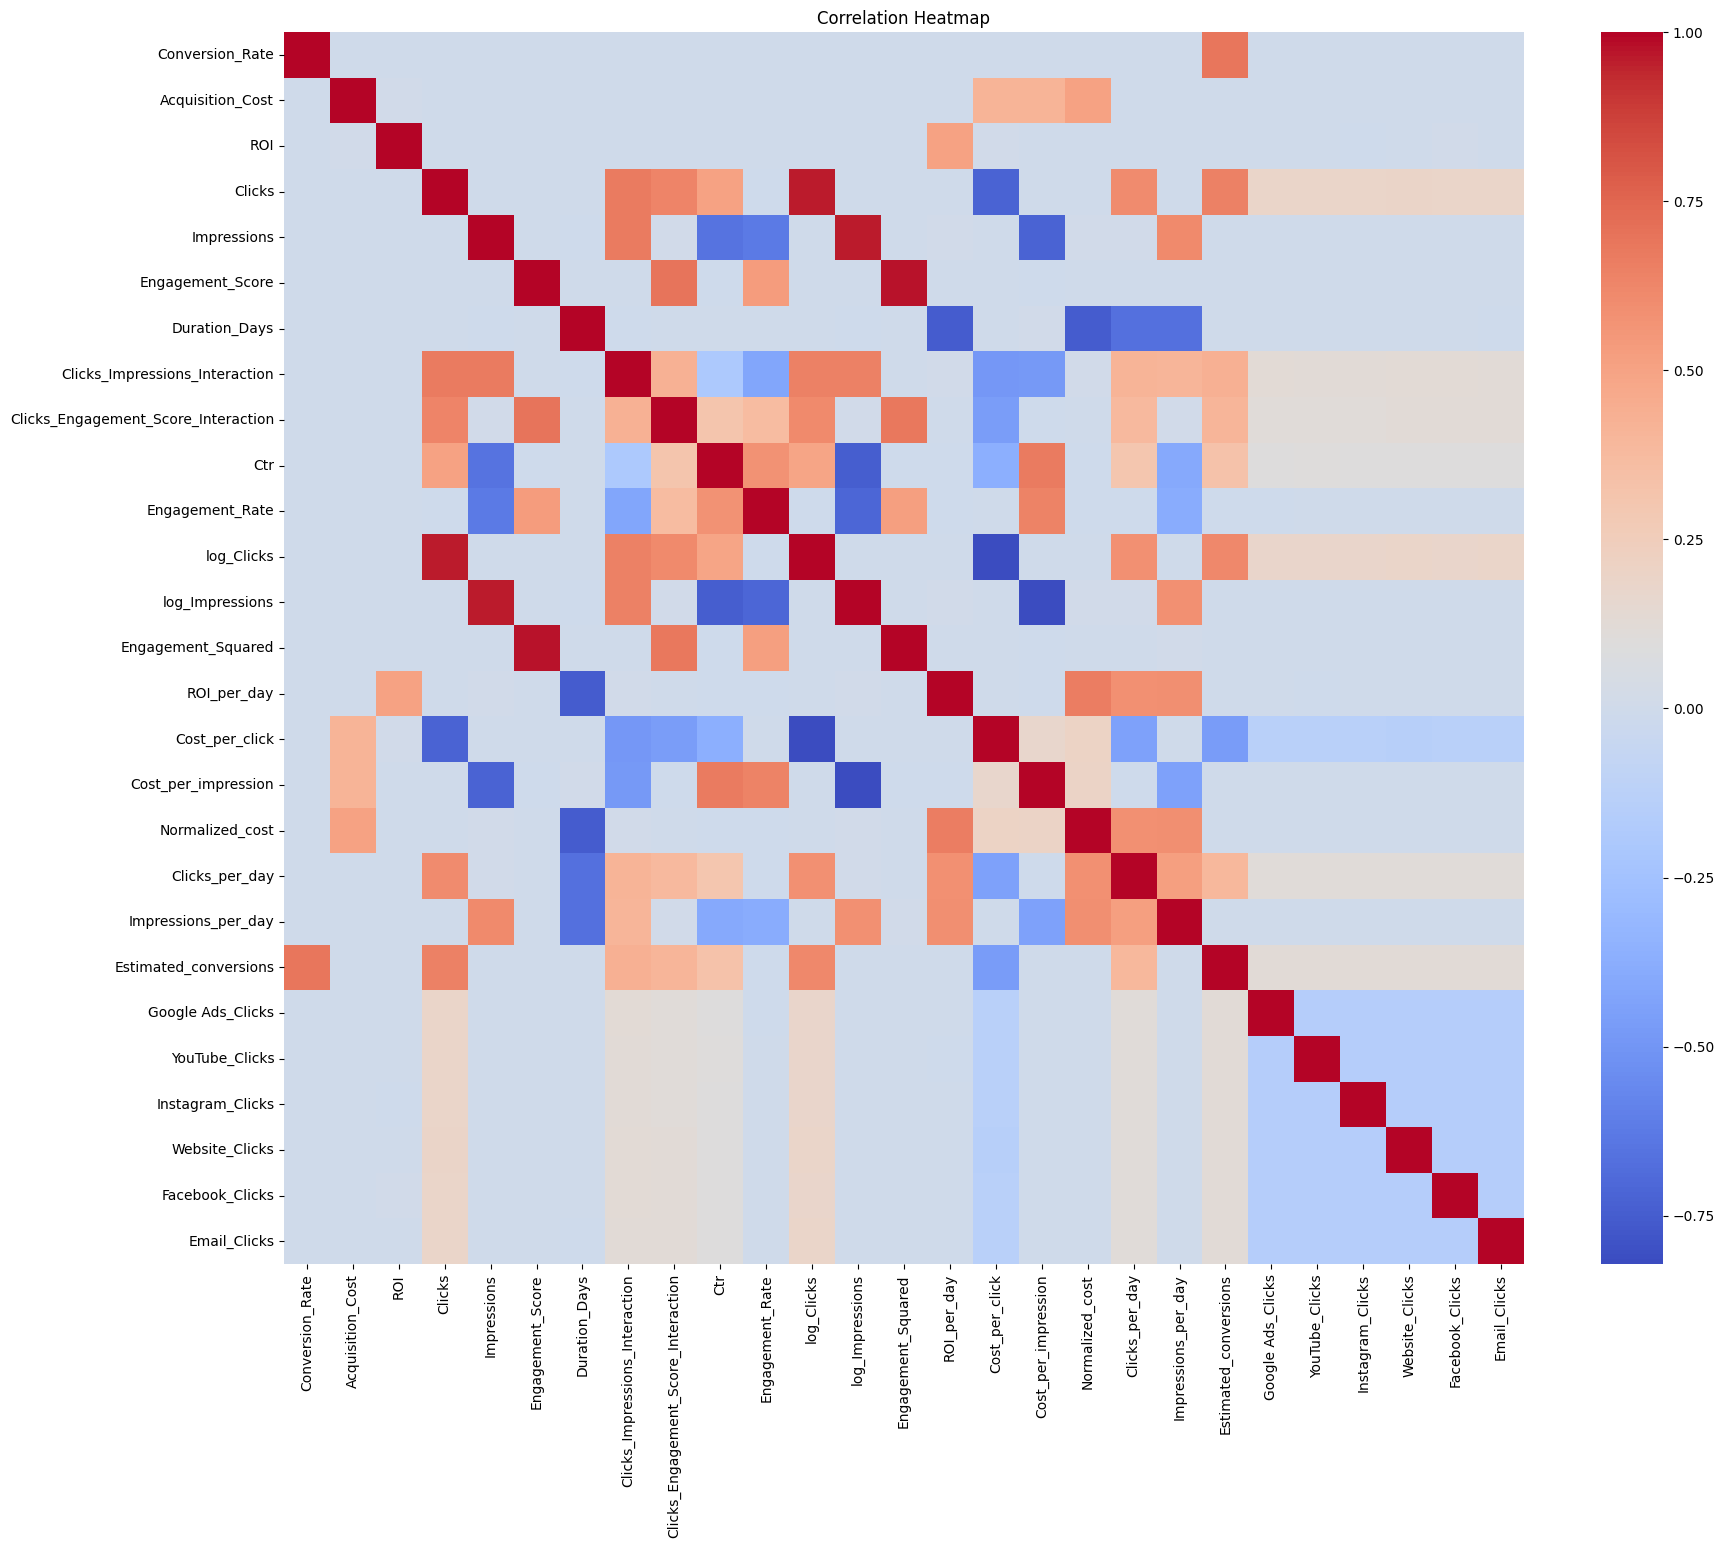

Highly correlated features: {'Engagement_Squared', 'log_Clicks', 'log_Impressions', 'Cost_per_click', 'Cost_per_impression'}


In [ ]:
# Select numeric columns
numeric_cols = marketing_data.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = marketing_data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Remove highly correlated features
threshold = 0.8
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features:", high_corr_features)

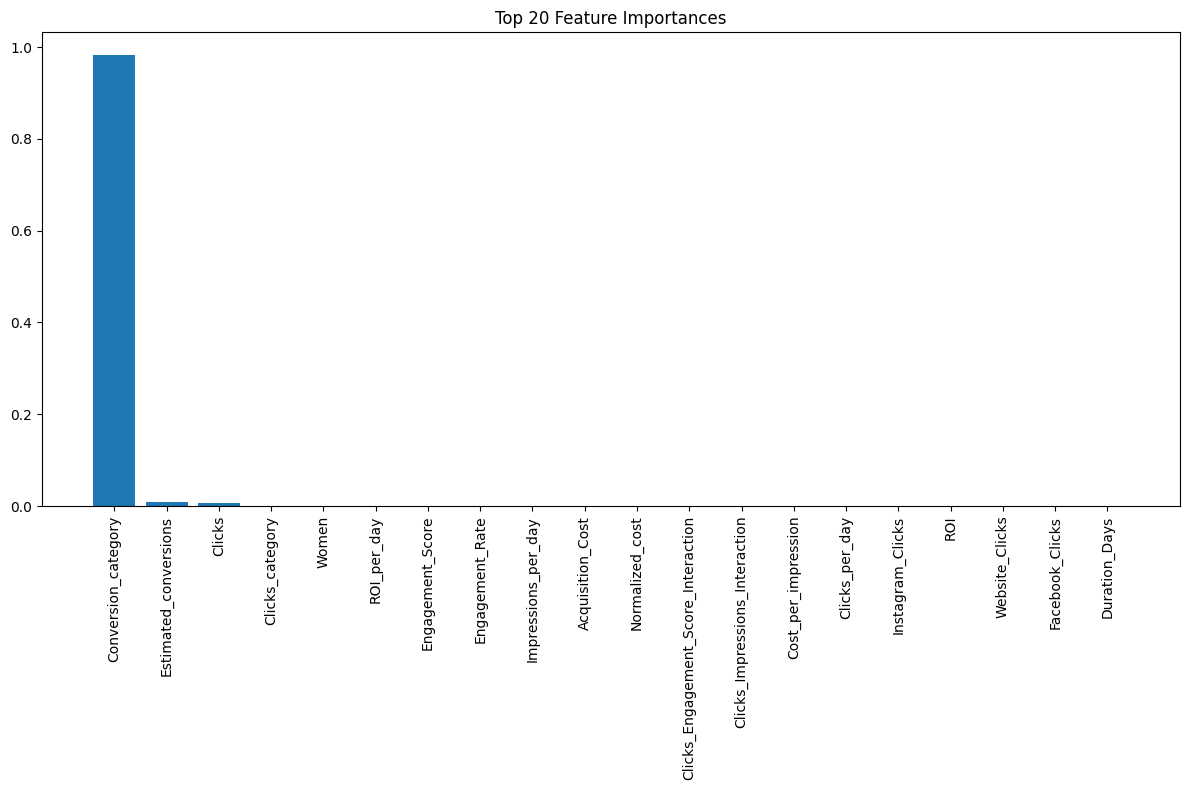

                                feature  importance
24                  Conversion_category    0.982930
25                Estimated_conversions    0.009815
2                                Clicks    0.006212
15                      Clicks_category    0.000565
7                                 Women    0.000059
16                          ROI_per_day    0.000051
4                      Engagement_Score    0.000039
11                      Engagement_Rate    0.000029
23                  Impressions_per_day    0.000028
0                      Acquisition_Cost    0.000026
20                      Normalized_cost    0.000024
9   Clicks_Engagement_Score_Interaction    0.000022
8        Clicks_Impressions_Interaction    0.000021
19                  Cost_per_impression    0.000021
22                       Clicks_per_day    0.000021
28                     Instagram_Clicks    0.000020
1                                   ROI    0.000017
29                       Website_Clicks    0.000016
30          

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming 'marketing_data' is your DataFrame
# Prepare the data
X = marketing_data.drop(['Conversion_Rate', 'Company', 'Campaign_Type', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Date', 'Age_Range'], axis=1)
y = marketing_data['Conversion_Rate']

# Handle categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include=['category', 'object']).columns:
    X[col] = le.fit_transform(X[col])

# Convert boolean columns to int
X['Men'] = X['Men'].astype(int)
X['Women'] = X['Women'].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importance = model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:20], feature_importance['importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

# Print top 20 important features
print(feature_importance.head(20))

In [ ]:
marketing_data['ROI_category'].value_counts()

,count
ROI_category,
low,66821
medium,66741
high,66437
